In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the file with data
file='apartments_pl_2023q3.csv'

df = pd.read_csv(file)

In [3]:
df.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000



# Dataset

The dataset contains over 19K apartment offers from the 15 largest cities in Poland (Warsaw, Lodz, Krakow, Wroclaw, Poznan, Gdansk, Szczecin, Bydgoszcz, Lublin, Katowice, Bialystok, Czestochowa). The data comes from local websites with apartments for sale. To fully capture the neighborhood of each apartment better, each offer was extended by data from the Open Street Map with distances to points of interest (POI). The data was collected in Q3 of 2023.

## Columns Description
- **city**: The name of the city where the property is located.

- **type**: Type of the building.

- **squareMeters**: The size of the apartment in square meters.

- **rooms**: Number of rooms in the apartment.

- **floor / floorCount**: The floor where the apartment is located and the total number of floors in the building.

- **buildYear**: The year when the building was built.

- **latitude, longitude**: Geo-coordinate of the property.

- **centreDistance**: Distance from the city center in kilometers.

- **poiCount**: Number of points of interest in a 500-meter range from the apartment, including schools, clinics, post offices, kindergartens, restaurants, colleges, and pharmacies.

- **[poiName]Distance**: Distance to the nearest point of interest, such as schools, clinics, post offices, kindergartens, restaurants, colleges, and pharmacies.

- **ownership**: The type of property ownership.

- **condition**: The condition of the apartment.

- **has[features]**: Indicates whether the property has key features such as an assigned parking space, balcony, elevator, security, or a storage room.

- **price**: Offer price in Polish Zloty (PLN).


In [4]:
#Checking data types and no of nulls - for later clearance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  19478 non-null  object 
 1   type                  15394 non-null  object 
 2   squareMeters          19478 non-null  float64
 3   rooms                 19478 non-null  float64
 4   floor                 15918 non-null  float64
 5   floorCount            19212 non-null  float64
 6   buildYear             16145 non-null  float64
 7   latitude              19478 non-null  float64
 8   longitude             19478 non-null  float64
 9   centreDistance        19478 non-null  float64
 10  poiCount              19478 non-null  float64
 11  schoolDistance        19464 non-null  float64
 12  clinicDistance        19390 non-null  float64
 13  postOfficeDistance    19453 non-null  float64
 14  kindergartenDistance  19465 non-null  float64
 15  restaurantDistance 

In [5]:
#Formatting for floats (price)
pd.set_option('float_format', '{:.2f}'.format)

In [6]:
df.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,19478.00,19478.00,15918.00,19212.00,16145.00,19478.00,19478.00,19478.00,19478.00,19464.00,19390.00,19453.00,19465.00,19420.00,18856.00,19451.00,19478.00
mean,58.64,2.68,3.35,5.30,1984.69,52.02,19.51,4.41,20.12,0.42,1.01,0.52,0.37,0.36,1.46,0.37,695267.69
std,21.05,0.90,2.55,3.32,33.70,1.36,1.77,2.85,23.60,0.47,0.92,0.51,0.45,0.48,1.10,0.47,347403.21
min,25.00,1.00,1.00,1.00,1850.00,49.98,14.45,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,150000.00
25%,44.40,2.00,2.00,3.00,1967.00,51.11,18.54,2.09,7.00,0.18,0.37,0.24,0.16,0.12,0.59,0.15,459000.00
50%,54.63,3.00,3.00,4.00,1990.00,52.19,19.91,4.03,13.00,0.29,0.70,0.39,0.26,0.24,1.15,0.24,620000.00
75%,68.40,3.00,4.00,6.00,2014.00,52.41,20.99,6.19,23.00,0.47,1.30,0.62,0.41,0.42,2.11,0.41,835000.00
max,150.00,6.00,29.00,29.00,2023.00,54.58,23.21,16.94,208.00,4.82,5.00,4.97,4.96,4.99,5.00,4.99,2500000.00


In [8]:
#Even for the records where within 500m there is no POI, we still mostly have distance to the nearest Post Office, school, clinic etc.
df[df['poiCount']==0][['poiCount','schoolDistance',	'clinicDistance', 'postOfficeDistance',	
                       'kindergartenDistance',	'restaurantDistance',	'collegeDistance']]

,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance
19,0.00,1.49,2.53,1.28,0.72,1.34,3.82
29,0.00,1.86,3.46,0.82,1.79,0.75,4.34
65,0.00,NaN,NaN,NaN,4.96,4.81,NaN
73,0.00,1.73,2.01,1.72,1.73,0.80,2.06
75,0.00,1.73,2.01,1.72,1.73,0.80,2.06
...,...,...,...,...,...,...,...
19249,0.00,0.90,2.10,0.99,1.12,0.98,0.62
19303,0.00,0.90,2.10,0.99,1.12,0.98,0.62
19306,0.00,0.90,2.10,0.99,1.12,0.98,0.62
19308,0.00,0.90,2.10,0.99,1.12,0.98,0.62


# Data Cleaning

We need to replace/remove some nulls



### First -  we are going to remove >3k records which doesn't have `buildYear`.

It is useful feature but it is hard to replace it knowing e.g. just the building type etc. We should still be fine with 16k records in dataset

In [9]:
df.dropna(subset=['buildYear'], inplace = True)

### Next - we will take care of column `condition`
There are just **4.6K** no-nulls, in addition the description provided with this dataset do not explain excatly how it was measured whether it is premium or low.
However we can see that categories **low** and **premium** are different within `price` & `buildYear`.
Decided to proceed with `BuildYear` as this category seem to separate condition better. Let's use year **1985** as threshold here (Q3 of **low** condition). Everything, being currently null, after 1985 will be classified as `premium`.

In [10]:
df['condition'].value_counts()

premium    2280
low        1815
Name: condition, dtype: int64

In [11]:
pd.set_option('float_format', '{:.2f}'.format)

In [12]:
df[df['condition'] == 'premium']['buildYear'].describe()

count   2280.00
mean    1991.72
std       34.19
min     1850.00
25%     1975.00
50%     2008.00
75%     2017.00
max     2023.00
Name: buildYear, dtype: float64

In [13]:
df[df['condition'] == 'low']['buildYear'].describe()

count   1815.00
mean    1968.09
std       28.02
min     1852.00
25%     1955.00
50%     1972.00
75%     1985.00
max     2023.00
Name: buildYear, dtype: float64

<Axes: xlabel='buildYear', ylabel='condition'>

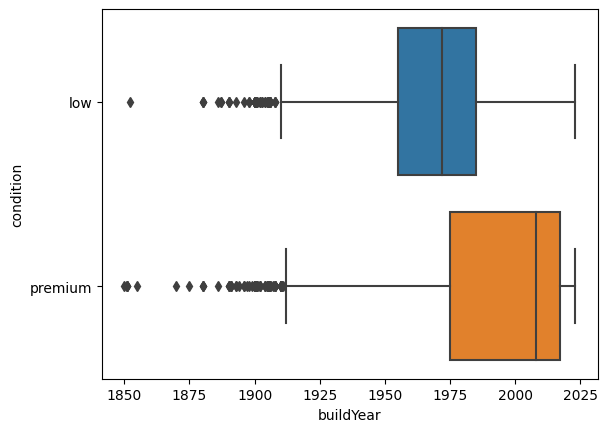

In [14]:
# Boxplot to visualize buildYear distribution separately for low and premium categories

condition_mask = df[(df['condition'].notna())]
sns.boxplot(data=condition_mask, x='buildYear', y="condition")

We can see that when we consider low/premium category the buildYear differs for those categories. As we can see median for low vs premium are different and can be a way to distinguish for NaN values for category.

In [15]:
df[df['condition'] == 'premium']['price'].describe()

count      2280.00
mean     785136.30
std      377274.04
min      205520.00
25%      539000.00
50%      699000.00
75%      921440.00
max     2500000.00
Name: price, dtype: float64

In [16]:
df[df['condition'] == 'low']['price'].describe()

count      1815.00
mean     587726.73
std      310619.34
min      150000.00
25%      369500.00
50%      529000.00
75%      700000.00
max     2360000.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='condition'>

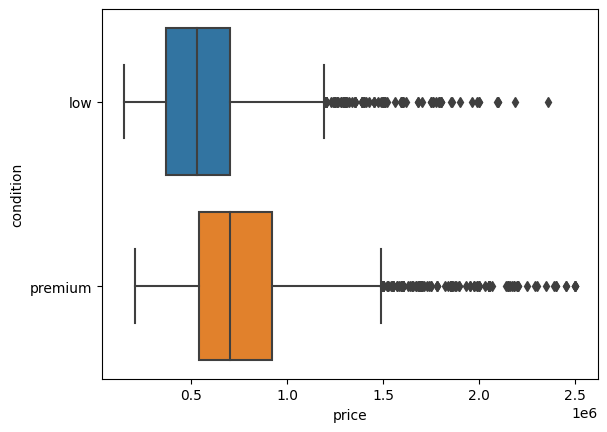

In [17]:
# Boxplot to visualize price distribution separately for low and premium categories

condition_mask = df[(df['condition'].notna())]
sns.boxplot(data=condition_mask, x='price', y="condition")

In [18]:
df[df['condition'].isnull()]  

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,blockOfFlats,63.00,3.00,4.00,10.00,1980.00,53.38,14.63,6.53,...,0.41,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
5,szczecin,blockOfFlats,63.30,3.00,2.00,4.00,1997.00,53.46,14.57,4.48,...,0.74,cooperative,concreteSlab,NaN,yes,yes,no,no,yes,499000
8,szczecin,blockOfFlats,47.76,2.00,8.00,12.00,1980.00,53.46,14.54,4.27,...,0.42,condominium,concreteSlab,NaN,no,yes,yes,no,yes,399000
10,szczecin,tenement,78.71,4.00,4.00,4.00,1930.00,53.45,14.55,2.75,...,0.21,condominium,brick,NaN,no,no,NaN,no,no,549000
11,szczecin,blockOfFlats,63.90,3.00,NaN,4.00,2000.00,53.37,14.66,9.24,...,0.24,cooperative,brick,NaN,no,yes,no,no,yes,545000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19467,bydgoszcz,apartmentBuilding,91.00,4.00,2.00,2.00,2015.00,53.12,18.05,3.29,...,0.15,condominium,brick,NaN,yes,yes,yes,no,no,870000
19472,bydgoszcz,tenement,108.96,5.00,2.00,4.00,1889.00,53.13,18.01,0.65,...,0.20,condominium,brick,NaN,no,no,no,no,yes,795000
19473,bydgoszcz,blockOfFlats,84.00,3.00,NaN,4.00,2000.00,53.11,17.98,1.96,...,0.16,cooperative,brick,NaN,yes,yes,no,no,yes,789000
19474,bydgoszcz,blockOfFlats,94.30,4.00,NaN,2.00,1998.00,53.12,17.96,3.04,...,0.43,condominium,NaN,NaN,no,yes,no,no,yes,699000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16145 entries, 0 to 19477
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  16145 non-null  object 
 1   type                  13166 non-null  object 
 2   squareMeters          16145 non-null  float64
 3   rooms                 16145 non-null  float64
 4   floor                 13248 non-null  float64
 5   floorCount            16020 non-null  float64
 6   buildYear             16145 non-null  float64
 7   latitude              16145 non-null  float64
 8   longitude             16145 non-null  float64
 9   centreDistance        16145 non-null  float64
 10  poiCount              16145 non-null  float64
 11  schoolDistance        16132 non-null  float64
 12  clinicDistance        16063 non-null  float64
 13  postOfficeDistance    16123 non-null  float64
 14  kindergartenDistance  16133 non-null  float64
 15  restaurantDistance 

In [20]:
# conditions filter
condition_prem = df[(df['condition'].isnull()) & (df['buildYear'] > 1985)]['condition']
condition_low = df[(df['condition'].isnull()) & (df['buildYear'] <= 1985)]['condition']

In [21]:
# Replace NaN values for condition_prem with 'premium'
df.loc[(df['condition'].isnull()) & (df['buildYear'] > 1985), 'condition'] = 'premium'

# Replace NaN values for condition_low with a different value, let's say 'low'
df.loc[(df['condition'].isnull()) & (df['buildYear'] <= 1985), 'condition'] = 'low'

### Now need to take care of nulls in building `type`. We can use `buildYear` and `poiCount` for that.

- We can assume that every building built before **1950** having null as type, we can assign to `tenement` category, as it was most common category.

- It looks like that for period between **1950-1960** we have 2 bigger group of similar size: tenements & Block of Flats. There is no clear way to distinguish between those groups, but it seems that tenements most have higher mean & median for `poiCount`, so we can set a threshold here: nulls with `poiCount` less than **30.0** (third quartile for  `blockOfFlats` for `poiCount` - these will be `blockOfFlats`, rest will became `tenement`

- For time between **1960-2000** we can use  `blockOfFlats` - vast majority of records is in this category

- More problematic period we can see after year **2000** - groups of `blockOfFlats` and `apartmentBuilding` are pretty much similar (first one bigger but just arbitrary pulling all the nuls into that category does not seem to be the best choice).
There are almost no big differences within those two categories after year **2000** if we look through columns, however we can use `price` as to distinguish - it won't be perfect though.
Let's use **700,000.00** as a threshold here - all above this price we will assign to `apartmentBuilding`, rest - `blockOfFlats`.

In [22]:
df[df['buildYear'] < 1950 ]['type'].value_counts()

tenement             1815
blockOfFlats          111
apartmentBuilding       7
Name: type, dtype: int64

In [23]:
df.loc[(df["buildYear"].between(1950, 1960 , inclusive='left'))  &  df['type'].isin(['blockOfFlats'])]['poiCount'].describe()

count   319.00
mean     27.10
std      20.79
min       0.00
25%      15.50
50%      22.00
75%      30.00
max     194.00
Name: poiCount, dtype: float64

In [24]:
df.loc[(df["buildYear"].between(1950, 1960 , inclusive='left'))  &  df['type'].isin(['tenement'])]['poiCount'].describe()

count   389.00
mean     43.52
std      35.67
min       1.00
25%      17.00
50%      32.00
75%      59.00
max     154.00
Name: poiCount, dtype: float64

In [25]:
df[(df["buildYear"].between(1950, 1960, inclusive='left')) & (df['poiCount'] >=  30.00)]['type'].value_counts()

tenement             204
blockOfFlats          84
apartmentBuilding      1
Name: type, dtype: int64

In [26]:
df.loc[df["buildYear"].between(1960, 2000)]['type'].value_counts()

blockOfFlats         4740
apartmentBuilding     175
tenement              158
Name: type, dtype: int64

In [27]:
df[df['buildYear'] > 2000 ]['type'].value_counts()

blockOfFlats         2920
apartmentBuilding    2530
Name: type, dtype: int64

In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
df[(df['buildYear'] > 2000) & df['type'].isin(['apartmentBuilding'])]['price'].describe()

count      2530.00
mean     928170.07
std      392368.81
min      275000.00
25%      645050.00
50%      842500.00
75%     1138040.50
max     2500000.00
Name: price, dtype: float64

In [30]:
df[(df['buildYear'] > 2000) & df['type'].isin(['blockOfFlats'])]['price'].describe()

count      2920.00
mean     748808.16
std      274785.46
min      245000.00
25%      563232.50
50%      689000.00
75%      880000.00
max     2200000.00
Name: price, dtype: float64

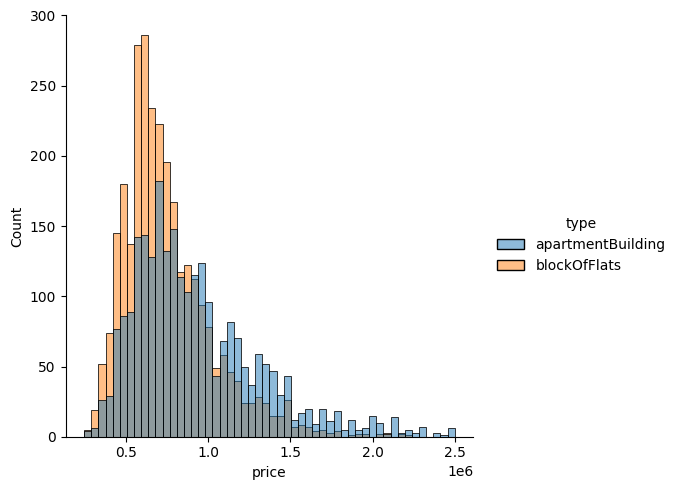

In [31]:
#Hist Plot
mask = df[(df['buildYear'] > 2000) & ((df['type'] == 'apartmentBuilding') | (df['type'] == 'blockOfFlats'))]
sns.displot(data=mask, x=mask["price"], hue=mask["type"])

<Axes: xlabel='price', ylabel='type'>

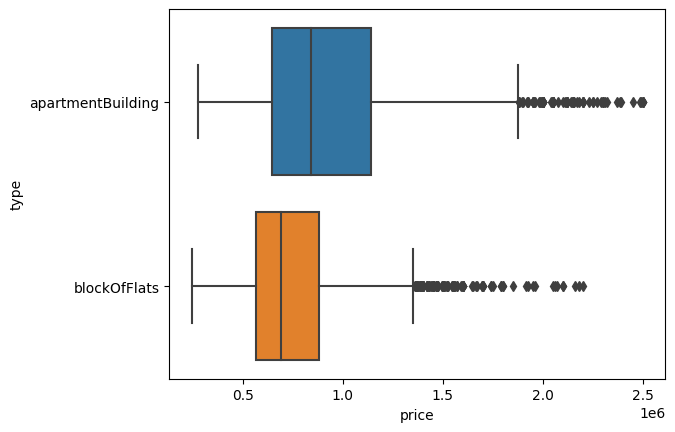

In [32]:
sns.boxplot(data=mask, x='price', y="type")

In [33]:
df[(df['buildYear'] > 2000) & (df['price'] <= 700000.00)]['type'].value_counts()

blockOfFlats         1562
apartmentBuilding     855
Name: type, dtype: int64

In [34]:
df[(df['buildYear'] > 2000) & (df['price'] > 700000.00)]['type'].value_counts()

apartmentBuilding    1675
blockOfFlats         1358
Name: type, dtype: int64

In [35]:
df['type'].value_counts()

blockOfFlats         8090
apartmentBuilding    2714
tenement             2362
Name: type, dtype: int64

In [36]:
# Replace null values in 'type' based on multiple conditions
type_ten_cond = (df['buildYear'] < 1950)
type_poi_count_ten =  (df["buildYear"].between(1950, 1960, inclusive='left')) & (df['poiCount'] >= 30)

type_poi_count_block = ((df["buildYear"].between(1950, 1960, inclusive='left')) & (df['poiCount'] < 30))
type_block_cond_yr = ((df['buildYear'] >= 1960) & (df['buildYear'] < 2000))
type_block_cond_price = ((df['buildYear'] >= 2000)  & (df['price'] <= 700000))

type_apart_cond_price = ((df['buildYear'] >= 2000)  & (df['price'] > 700000))

# Replace NaN values for 'type' w tenement
df.loc[(df['type'].isnull()) & (type_ten_cond | type_poi_count_ten), 'type'] = 'tenement'

# Replace NaN values for 'type' w blockOfFlats
df.loc[(df['type'].isnull()) & (type_poi_count_block | type_block_cond_yr | type_block_cond_price), 'type'] = 'blockOfFlats'

# Replace NaN values for 'type' w apartmentBuilding
df.loc[(df['type'].isnull()) & type_apart_cond_price, 'type'] = 'apartmentBuilding'

## Now missing buildingMaterial

There are more than 7k nulls in `buildingMaterial` column. The idea is to take the most common material used for each building type and replace nulls with that value. In this case for all of the types it's 'brick' - we'll use that.

In [37]:
# There are (initially) more than 7k nulls in buildingMaterial col.
#The idea is to take the most common material used for each building type and replace nulls with that

most_common_material = df.groupby('type')['buildingMaterial'].agg(lambda x: x.mode().iloc[0]).reset_index()

print(most_common_material)

                type buildingMaterial
0  apartmentBuilding            brick
1       blockOfFlats            brick
2           tenement            brick


In [38]:
df['buildingMaterial'].value_counts()

brick           7846
concreteSlab    2426
Name: buildingMaterial, dtype: int64

In [39]:
df['buildingMaterial'].fillna('brick', inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16145 entries, 0 to 19477
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  16145 non-null  object 
 1   type                  16145 non-null  object 
 2   squareMeters          16145 non-null  float64
 3   rooms                 16145 non-null  float64
 4   floor                 13248 non-null  float64
 5   floorCount            16020 non-null  float64
 6   buildYear             16145 non-null  float64
 7   latitude              16145 non-null  float64
 8   longitude             16145 non-null  float64
 9   centreDistance        16145 non-null  float64
 10  poiCount              16145 non-null  float64
 11  schoolDistance        16132 non-null  float64
 12  clinicDistance        16063 non-null  float64
 13  postOfficeDistance    16123 non-null  float64
 14  kindergartenDistance  16133 non-null  float64
 15  restaurantDistance 

### Replacing nulls in elevator - for flats before 2002 - no elevator, after this year if has more than **5 floors** ('4 pietra') - we assume it has elevator, otherwise no.

In [41]:
elevator_cond = (df['buildYear'] >= 2002)  & (df['floorCount'] > 4.0 )
no_elevator_cond = (df['buildYear'] < 2002)
no_elev_cond_after_2002 = (df['buildYear'] >= 2002)  & (df['floorCount'] <= 4.0 )

df.loc[(df['hasElevator'].isnull()) & (elevator_cond), 'hasElevator'] = 'yes'
df.loc[(df['hasElevator'].isnull()) & (no_elevator_cond | no_elev_cond_after_2002), 'hasElevator'] = 'no'

In [42]:
df['hasElevator'].value_counts()

no     8359
yes    7766
Name: hasElevator, dtype: int64

### Now floor & floorCount

For records with missing `floor` but having `floorCount`, we will use mid - floor. Otherwise use median for all not nulls.
For `floorCount` we'll use median.

In [43]:
df[['floor', 'floorCount']].describe()

,floor,floorCount
count,13248.00,16020.00
mean,3.36,5.33
std,2.57,3.31
min,1.00,1.00
25%,2.00,3.00
50%,3.00,4.00
75%,4.00,6.00
max,29.00,29.00


In [44]:
# floor if floorCount present - pick mid floor
df.loc[(df['floor'].isnull()) & (~df['floorCount'].isnull()), 'floor'] = df['floorCount'] // 2
# floor if no floorCount
df.loc[(df['floor'].isnull()) & (df['floorCount'].isnull()), 'floor'] = df['floor'].median()

In [45]:
#Using median of `floorCount` for nulls
df.loc[df['floorCount'].isnull(), 'floorCount'] = df['floorCount'].median()

### Now we neeed to take care of nulls within `schoolDistance`, `clinicDistance`, `postOfficeDistance`, `kindergartenDistance`, `restaurantDistance`, `collegeDistance` and `pharmacyDistance`. We'll use median for all of these values

In [46]:
distance_null_columns = ['schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance', 'collegeDistance', 'pharmacyDistance']

for column in distance_null_columns:
  df.loc[df[column].isnull(), column] = df[column].median()

# Let's Explore the Data:
### First - check in which city we have most properties inside this dataset

In [47]:
df['city'].value_counts()

warszawa       5104
krakow         2655
gdansk         1726
wroclaw        1555
lodz           1081
gdynia          750
lublin          611
bydgoszcz       596
poznan          555
szczecin        477
radom           313
katowice        289
bialystok       220
rzeszow         162
czestochowa      51
Name: city, dtype: int64

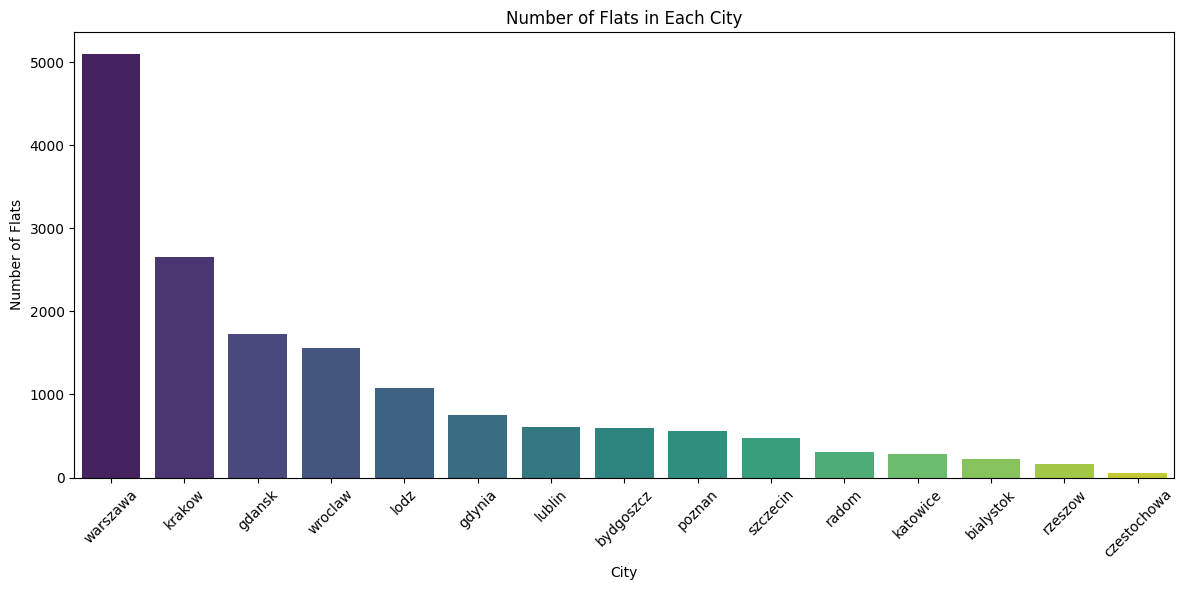

In [48]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Flats']

plt.figure(figsize=(12, 6)) 
sns.barplot(data=city_counts, x='City', y='Number of Flats', palette='viridis')

plt.xticks(rotation=45, ha='center')
plt.xlabel('City')
plt.ylabel('Number of Flats')
plt.title('Number of Flats in Each City')

plt.tight_layout()
plt.show()

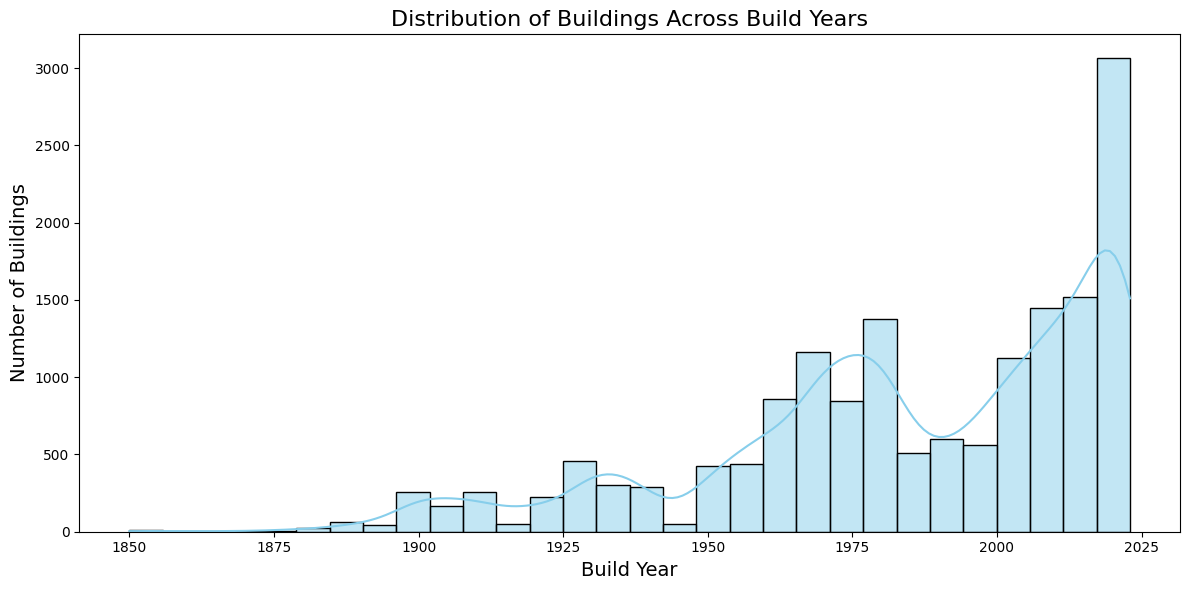

In [49]:
#Number of buildings among the years in this dataset
plt.figure(figsize=(12, 6)) 

sns.histplot(data=df, x='buildYear', bins=30, kde=True, color='skyblue')

plt.xlabel('Build Year', fontsize=14)
plt.ylabel('Number of Buildings', fontsize=14)
plt.title('Distribution of Buildings Across Build Years', fontsize=16)

plt.tight_layout()
plt.show()

Now let's look at quite obvious thing - relationship between square metres and price of the property. We can clearly see that there is some correlation between 
square metres and price of the property.

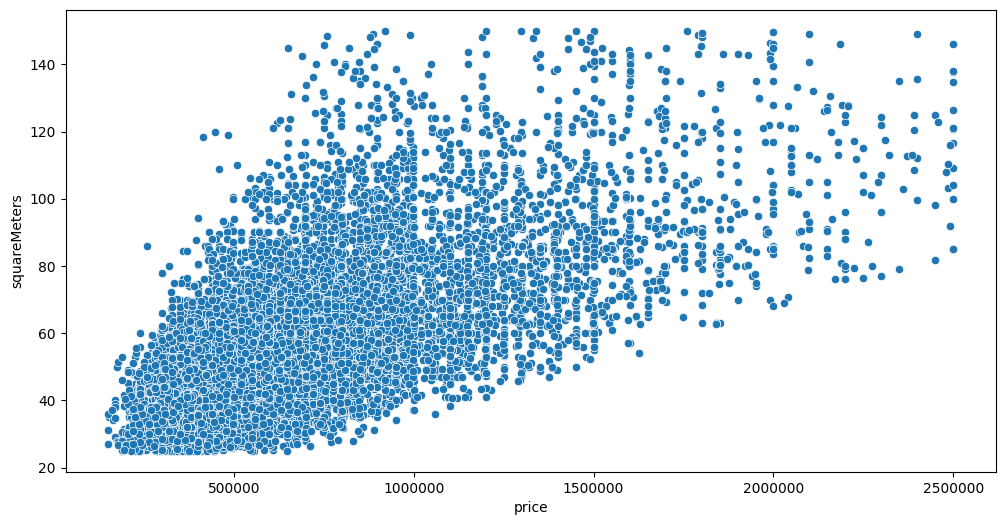

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="price", y="squareMeters")
plt.ticklabel_format(style='plain', axis='x')


plt.show();

C:\Users\piotr\AppData\Local\Temp\ipykernel_24348\2118012752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidth = 0.2,)


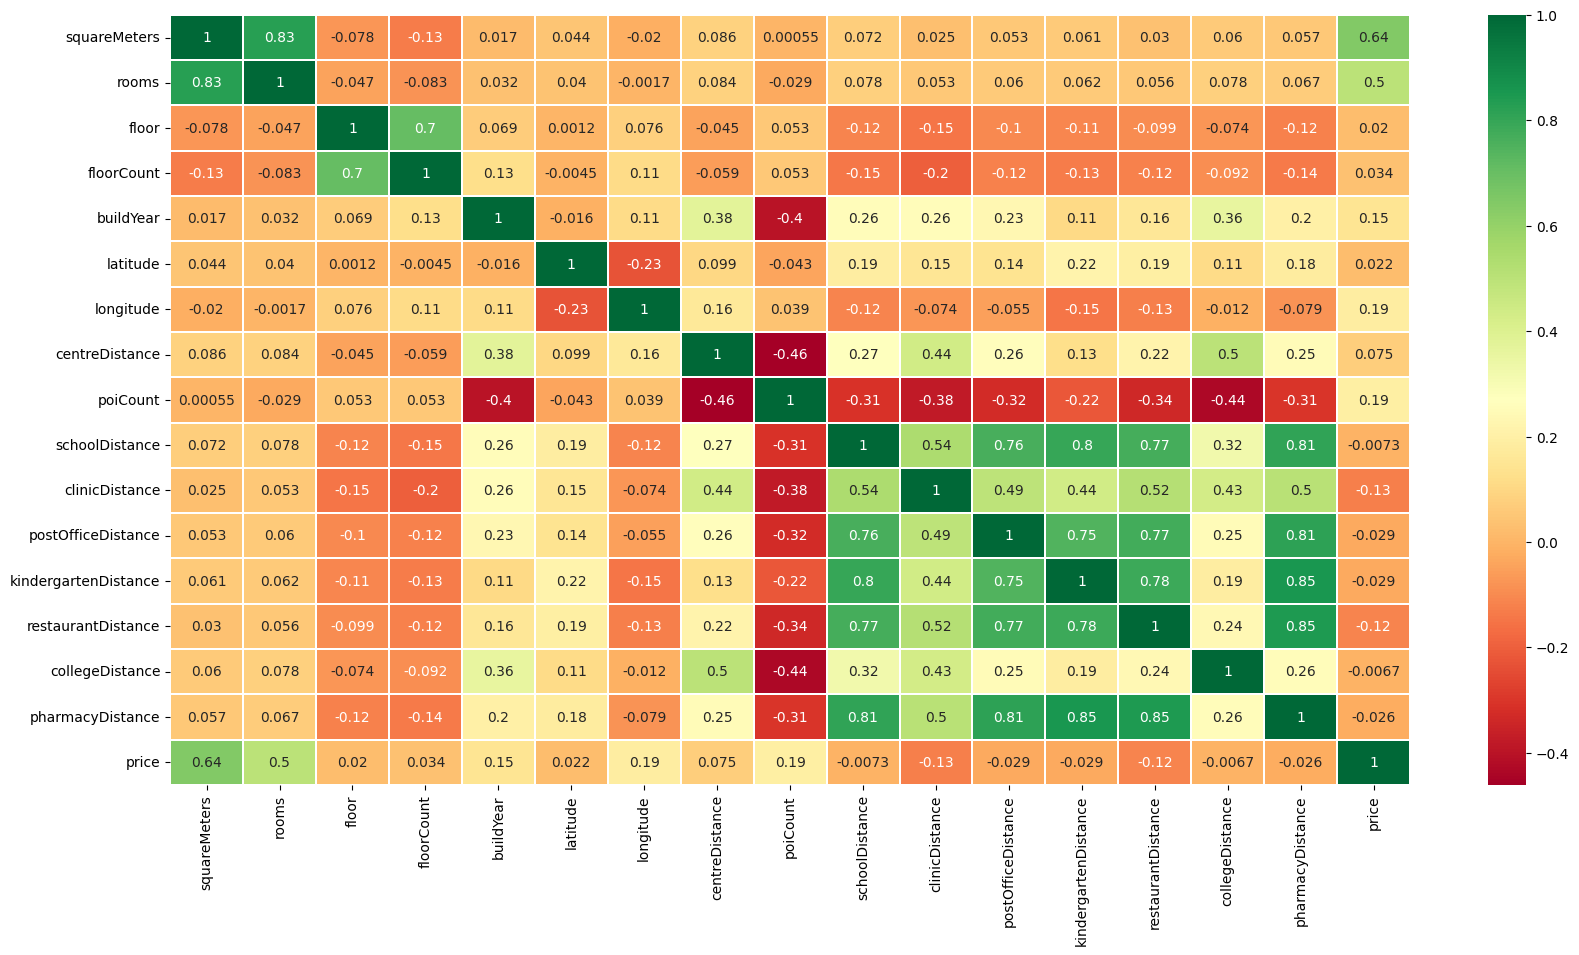

In [51]:
# Heatmap of correlation between variables - not that it is only between numeric variables. We will check for other variables after encoding
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidth = 0.2,)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

## Preprocessing

We need to convert categorical columns into numeric using one hot encoding

In [52]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

cat_cols = list(set(cols) - set(num_cols))

In [53]:
df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)

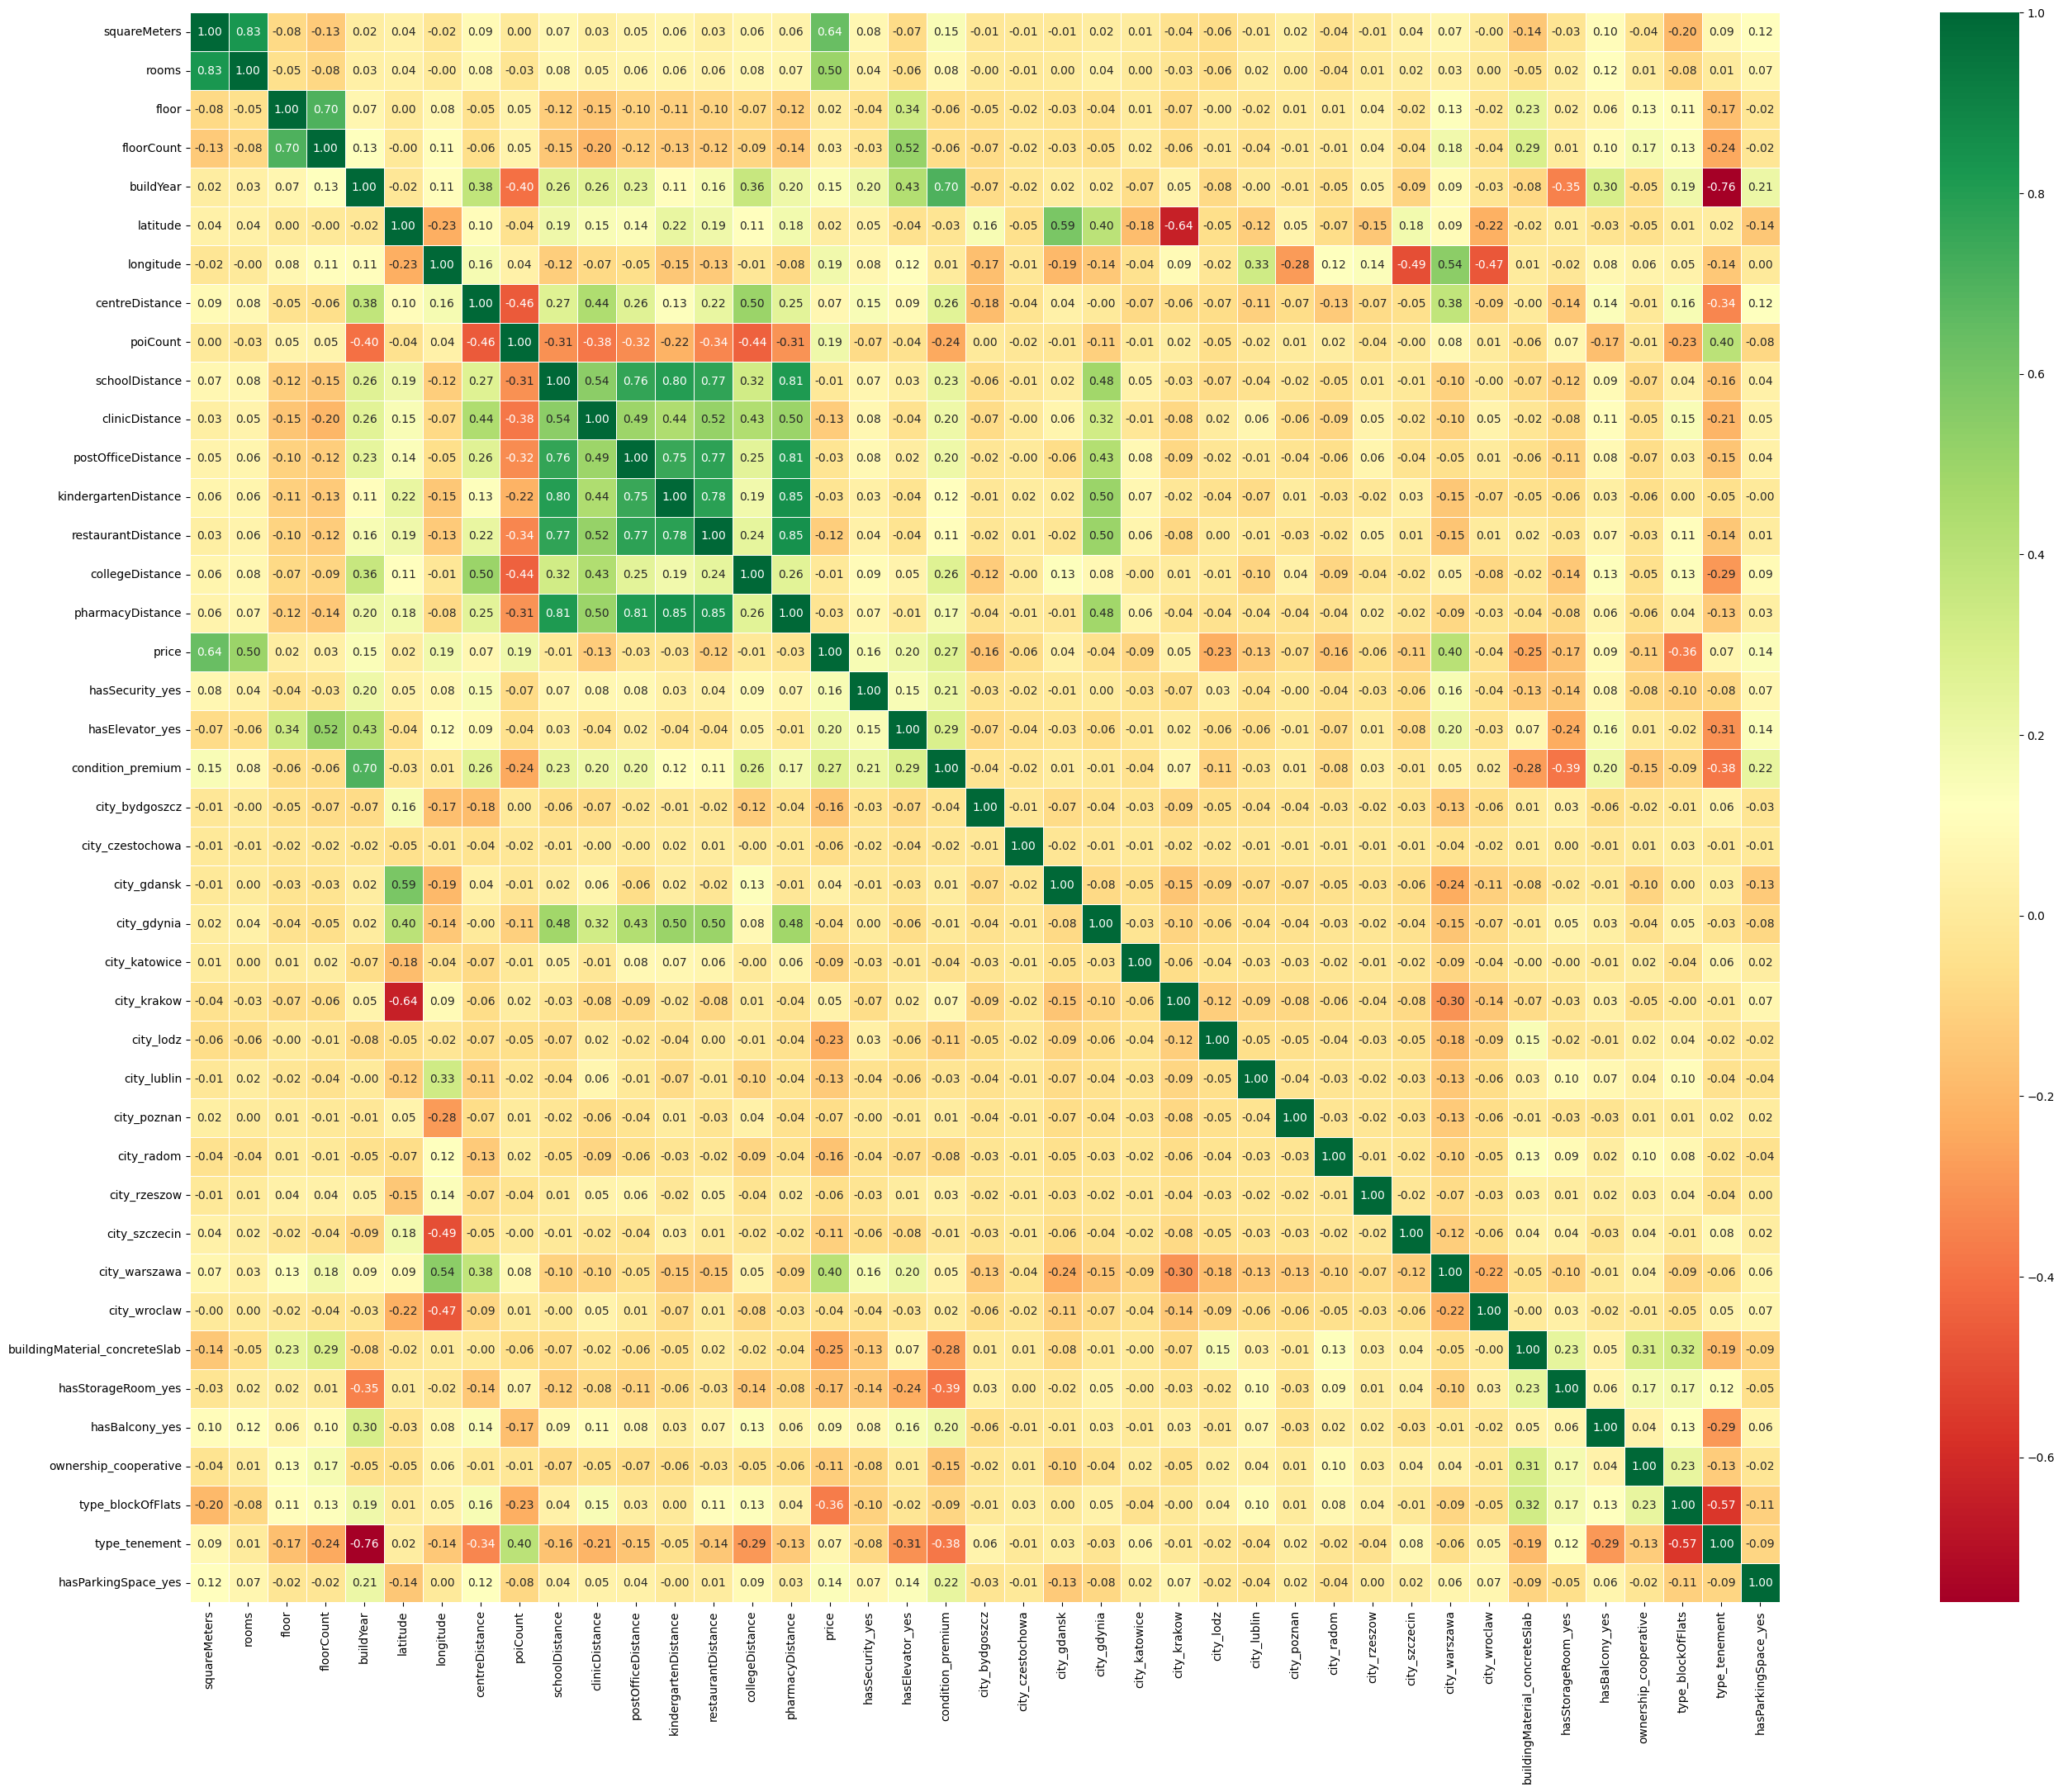

In [54]:
#Heatmap for all of the features (after one hot encoding)

plt.figure(figsize=(50, 25)) 
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='RdYlGn', linewidth=0.5, square=True,
                     )

plt.show()

In [55]:
df.corr()[abs(df.corr()['price']) >=0.1]['price']

squareMeters                     0.64
rooms                            0.50
buildYear                        0.15
longitude                        0.19
poiCount                         0.19
clinicDistance                  -0.13
restaurantDistance              -0.12
price                            1.00
hasSecurity_yes                  0.16
hasElevator_yes                  0.20
condition_premium                0.27
city_bydgoszcz                  -0.16
city_lodz                       -0.23
city_lublin                     -0.13
city_radom                      -0.16
city_szczecin                   -0.11
city_warszawa                    0.40
buildingMaterial_concreteSlab   -0.25
hasStorageRoom_yes              -0.17
ownership_cooperative           -0.11
type_blockOfFlats               -0.36
hasParkingSpace_yes              0.14
Name: price, dtype: float64

In [56]:
df_shuffled = df.sample(n=len(df), random_state=1)

In [57]:
df_shuffled.columns

Index(['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude',
       'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
       'restaurantDistance', 'collegeDistance', 'pharmacyDistance', 'price',
       'hasSecurity_yes', 'hasElevator_yes', 'condition_premium',
       'city_bydgoszcz', 'city_czestochowa', 'city_gdansk', 'city_gdynia',
       'city_katowice', 'city_krakow', 'city_lodz', 'city_lublin',
       'city_poznan', 'city_radom', 'city_rzeszow', 'city_szczecin',
       'city_warszawa', 'city_wroclaw', 'buildingMaterial_concreteSlab',
       'hasStorageRoom_yes', 'hasBalcony_yes', 'ownership_cooperative',
       'type_blockOfFlats', 'type_tenement', 'hasParkingSpace_yes'],
      dtype='object')

In [58]:
df_final = df_shuffled[['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude',
       'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
       'restaurantDistance', 'collegeDistance', 'pharmacyDistance',
       'buildingMaterial_concreteSlab', 'hasSecurity_yes',
       'hasStorageRoom_yes', 'hasParkingSpace_yes', 'city_bydgoszcz',
       'city_czestochowa', 'city_gdansk', 'city_gdynia', 'city_katowice',
       'city_krakow', 'city_lodz', 'city_lublin', 'city_poznan', 'city_radom',
       'city_rzeszow', 'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'hasBalcony_yes', 'hasElevator_yes', 'condition_premium',
       'type_blockOfFlats', 'type_tenement', 'ownership_cooperative',  'price']]

In [59]:
X = df_final.drop('price', axis=1)
y = df_final['price']

In [60]:
X.columns

Index(['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude',
       'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
       'restaurantDistance', 'collegeDistance', 'pharmacyDistance',
       'buildingMaterial_concreteSlab', 'hasSecurity_yes',
       'hasStorageRoom_yes', 'hasParkingSpace_yes', 'city_bydgoszcz',
       'city_czestochowa', 'city_gdansk', 'city_gdynia', 'city_katowice',
       'city_krakow', 'city_lodz', 'city_lublin', 'city_poznan', 'city_radom',
       'city_rzeszow', 'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'hasBalcony_yes', 'hasElevator_yes', 'condition_premium',
       'type_blockOfFlats', 'type_tenement', 'ownership_cooperative'],
      dtype='object')

In [61]:
X.columns[:16]

Index(['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude',
       'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
       'restaurantDistance', 'collegeDistance', 'pharmacyDistance'],
      dtype='object')

In [62]:
X[['buildingMaterial_concreteSlab', 'hasSecurity_yes',
       'hasStorageRoom_yes', 'hasParkingSpace_yes', 'city_bydgoszcz',
       'city_czestochowa', 'city_gdansk', 'city_gdynia', 'city_katowice',
       'city_krakow', 'city_lodz', 'city_lublin', 'city_poznan', 'city_radom',
       'city_rzeszow', 'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'hasBalcony_yes', 'hasElevator_yes', 'condition_premium',
       'type_blockOfFlats', 'type_tenement', 'ownership_cooperative']]

,buildingMaterial_concreteSlab,hasSecurity_yes,hasStorageRoom_yes,hasParkingSpace_yes,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_krakow,...,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,hasBalcony_yes,hasElevator_yes,condition_premium,type_blockOfFlats,type_tenement,ownership_cooperative
17413,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6095,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
12170,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
17977,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
5880,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19444,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6152,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
14760,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,0,0
283,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [63]:
pd.set_option('display.max_columns', None)
X

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,buildingMaterial_concreteSlab,hasSecurity_yes,hasStorageRoom_yes,hasParkingSpace_yes,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,hasBalcony_yes,hasElevator_yes,condition_premium,type_blockOfFlats,type_tenement,ownership_cooperative
17413,38.00,2.00,7.00,10.00,1970.00,52.27,20.97,4.66,12.00,0.15,0.48,0.88,0.27,0.54,0.42,0.23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
6095,51.50,2.00,3.00,3.00,2018.00,54.30,18.61,5.97,1.00,1.12,3.82,1.44,1.18,1.23,2.72,0.17,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
12170,50.00,3.00,2.00,4.00,2017.00,51.22,22.63,5.44,7.00,0.49,3.41,0.46,0.18,0.16,2.37,0.40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0
17977,117.00,6.00,3.00,4.00,1938.00,52.21,21.02,2.91,34.00,0.11,0.31,0.29,0.33,0.12,0.15,0.26,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
5880,75.00,3.00,3.00,4.00,1953.00,54.35,18.65,0.41,121.00,0.27,0.39,0.15,0.17,0.07,0.33,0.03,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19444,86.68,3.00,3.00,3.00,1908.00,53.13,18.01,0.65,54.00,0.11,0.20,0.35,0.41,0.06,0.62,0.20,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6152,56.28,3.00,3.00,16.00,2021.00,54.36,18.59,4.26,17.00,0.13,0.78,0.25,0.13,0.16,2.60,0.19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
14760,28.98,1.00,2.00,4.00,2020.00,52.26,21.04,4.26,20.00,0.13,0.65,0.28,0.10,0.14,0.70,0.26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0
283,52.31,2.00,1.00,4.00,1940.00,53.46,14.55,3.64,4.00,0.71,0.95,0.24,0.19,0.53,1.80,0.12,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


We need to split the data - for train & test sets, but we will also use holdout validation set to measure models.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

In [67]:
X_train.shape

(13077, 40)

In [68]:
y_train.shape

(13077,)

It makes sense to scale the data here as values could be small or big (1000s)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [70]:
X_train.iloc[:, :16] 

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance
17547,61.00,3.00,3.00,3.00,1983.00,52.31,20.96,9.54,13.00,0.19,1.15,0.35,0.08,0.19,0.46,0.24
9037,72.00,4.00,2.00,4.00,1930.00,51.11,17.06,2.37,27.00,0.38,0.40,0.17,0.30,0.25,0.83,0.21
3186,45.00,3.00,1.00,3.00,1941.00,50.07,19.92,1.92,25.00,0.11,0.59,0.17,0.33,0.14,0.58,0.17
10020,48.29,3.00,1.00,3.00,2015.00,51.78,19.39,4.66,7.00,0.19,2.11,0.13,0.72,0.06,1.34,0.07
8416,60.79,3.00,2.00,4.00,2017.00,51.06,16.98,6.27,9.00,0.48,1.78,0.47,0.26,0.14,3.22,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,39.35,2.00,12.00,14.00,2021.00,54.39,18.65,4.84,12.00,0.14,0.19,1.31,0.22,0.36,2.21,0.34
7689,81.33,4.00,1.00,3.00,2021.00,51.13,17.10,5.58,2.00,0.56,2.86,0.11,0.29,1.16,1.98,1.24
7563,37.56,2.00,2.00,4.00,2015.00,51.07,17.06,5.19,0.00,1.04,2.07,1.27,0.51,1.22,2.58,1.39
6972,59.70,3.00,3.00,3.00,2004.00,54.34,18.59,4.18,0.00,0.61,0.77,0.77,0.80,0.82,3.93,0.96


In [71]:
# Use for scaling just the cols which have values other than 0 / 1 and not the label column.
scaler.fit(X_train.iloc[:, :16])

def preprocessor(X):
  A = X.copy()
  A.iloc[:, :16] = scaler.transform(A.iloc[:, :16] ) # take & transform just the cols which have values other than 0 / 1 and not the label column.
  return A

X_train, X_valid, X_test = preprocessor(X_train), preprocessor(X_valid), preprocessor(X_test)

# Building a model

### Models without changing hyperparameters

As a starting point let's look at Linear Regression:

In [72]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)
mse(lin_reg.predict(X_train), y_train, squared=False), mse(lin_reg.predict(X_valid), y_valid, squared=False) # squared set to False so we will get rmse as result

(175126.17013995766, 170051.56404712066)

Let's check different models: KNN Regressor, Random Forest and Gradient Boosting, with Grid Search too look for best params

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_valid), y_valid, squared=False)

(137218.24808908327, 152193.28036492036)

In [75]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_valid), y_valid, squared=False)

(44779.098856382756, 113618.04146045454)

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_valid), y_valid, squared=False)

(134237.78726489082, 139519.26078708514)

In [77]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=42).fit(X_train, y_train)
mse(xgb_reg.predict(X_train), y_train, squared=False), mse(xgb_reg.predict(X_valid), y_valid, squared=False)

(67918.27868999432, 116328.97813752545)

Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV 

In [79]:
forest_reg = RandomForestRegressor()

In [80]:
forest_param_grid = {
    'max_samples': [0.8],
    'n_estimators': [300, 500],
    'max_depth': [5, 7, 9],
    'min_samples_split' : [4, 16, 64],
}

forest_grid = GridSearchCV(forest_reg, forest_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)

In [81]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'max_samples': [0.8],
                         'min_samples_split': [4, 16, 64],
                         'n_estimators': [300, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [82]:
best_forest = forest_grid.best_estimator_

In [83]:
best_forest

RandomForestRegressor(max_depth=9, max_samples=0.8, min_samples_split=4,
                      n_estimators=300)

In [84]:
mse(best_forest.predict(X_train), y_train, squared=False), mse(best_forest.predict(X_valid), y_valid, squared=False) 

(96492.47141357174, 124267.43879235417)

In [85]:
new_forest = RandomForestRegressor(max_depth=9, max_samples=0.8, min_samples_split=4,
                      n_estimators=500, random_state=42).fit(X_train, y_train)

mse(new_forest.predict(X_train), y_train, squared=False), mse(new_forest.predict(X_valid), y_valid, squared=False) 

(96529.3369104976, 124552.130255627)

GradientBoostingRegressor model

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [88]:
gbr_param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.01,  0.1], 
    'min_samples_split': [50, 100],
    'max_depth' : [7, 8],
    'min_samples_leaf': [10, 25],
}

gbr_grid = GridSearchCV(gbr, gbr_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)

In [89]:
gbr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [7, 8],
                         'min_samples_leaf': [10, 25],
                         'min_samples_split': [50, 100],
                         'n_estimators': [500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [90]:
best_gbr = gbr_grid.best_estimator_
best_gbr

GradientBoostingRegressor(max_depth=8, min_samples_leaf=25,
                          min_samples_split=50, n_estimators=500)

In [91]:
mse(best_gbr.predict(X_train), y_train, squared=False), mse(best_gbr.predict(X_valid), y_valid, squared=False) 

(40670.150831726736, 110362.81219864979)

----

In [125]:
add_gbr=GradientBoostingRegressor(learning_rate=0.01, max_depth=8, min_samples_leaf=25,
                          min_samples_split=50, n_estimators=500,
                           random_state=42).fit(X_train, y_train)

mse(add_gbr.predict(X_train), y_train, squared=False), mse(add_gbr.predict(X_valid), y_valid, squared=False)

(84749.50739612148, 116281.44360564335)

XGBoost Regressor tuned model

In [94]:
xgb_reg_tun = xgb.XGBRegressor()

xgb_param_grid = {
    'n_estimators': [1000, 5000],
    'max_depth' : [6, 7],
    'eta': [0.01, 0.1],
    'colsample_bytree': [0.1, 0.2,],
    'min_child_weight': [50, 100],
    'random_state': [42]
}

xgb_grid = GridSearchCV(xgb_reg_tun, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)

In [95]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.2], 'eta': [0.01, 0.1],
                         'max_depth': [6, 7], 'min_child_weight': [50, 100],
                         'n_estimators': [1000, 5000], 'random_state': [42]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [96]:
best_xgb = xgb_grid.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=50, missing=nan,
             monotone_constraints=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [97]:
mse(best_xgb.predict(X_train), y_train, squared=False), mse(best_xgb.predict(X_valid), y_valid, squared=False) 

(63890.41558467605, 112212.48086110615)

In [98]:
##Testing
new_xgb=xgb.XGBRegressor(n_estimators=7000, max_depth=7, eta=0.01, min_child_weight=100, colsample_bytree=0.3,
                         random_state=42).fit(X_train, y_train) 

mse(new_xgb.predict(X_train), y_train, squared=False), mse(new_xgb.predict(X_valid), y_valid, squared=False)

(69877.92378947679, 112066.63437487838)

Best XGB Model:

In [99]:
final_xgb=xgb.XGBRegressor(n_estimators=7000, max_depth=8, eta=0.005, min_child_weight=150, colsample_bytree=0.3,
                         random_state=42).fit(X_train, y_train) 

mse(final_xgb.predict(X_train), y_train, squared=False), mse(final_xgb.predict(X_valid), y_valid, squared=False)

(84492.70315329533, 115194.68634725979)

Best GBR Model:

In [100]:
add_gbr=GradientBoostingRegressor(learning_rate=0.01, max_depth=8, min_samples_leaf=25,
                          min_samples_split=50, n_estimators=500,
                           random_state=42).fit(X_train, y_train)

mse(add_gbr.predict(X_train), y_train, squared=False), mse(add_gbr.predict(X_valid), y_valid, squared=False)

(84749.50739612148, 116281.44360564335)

# Conclusion
### Looking at the results, after testing diferent hyperparameters, the best model here will be XGBoost

## Testing

Now it is time to check result for the best model on test set.

In [126]:
print("Error on test set:")
print(mse(final_xgb.predict(X_test), y_test, squared=False))

Error on test set:
117355.3848495832


Let's test additional sample - will check predicted price of the apartment I currently live in. 
First will need to prepare and preprocess that record:

In [127]:
# city, type, squareMeters, rooms, floor, floorCount, buildYear, latitude, longitude, centreDistance, poiCount,	
# schoolDistance,	clinicDistance,	postOfficeDistance,	kindergartenDistance, restaurantDistance, collegeDistance, 
# pharmacyDistance, ownership, buildingMaterial, condition, hasParkingSpace, hasBalcony, hasElevator, hasSecurity, hasStorageRoom,

my_apartment = ['krakow', 'blockOfFlats', 45.70, 2, 6, 8, 2017,50.105879, 20.014308, 9.7, 3,  1.4, 2.4, 1.2, 0.02, 0.15, 4.7, 0.85, 'condominium', 'concreteSlab', 'low', 'no', 'yes', 'yes', 'no', 'yes' ]
columns=['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom']


df_my_apartment = pd.DataFrame([my_apartment], columns=columns)

df_my_apartment

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,krakow,blockOfFlats,45.70,2,6,8,2017,50.11,20.01,9.70,3,1.40,2.40,1.20,0.02,0.15,4.70,0.85,condominium,concreteSlab,low,no,yes,yes,no,yes


In [128]:
new_cols = df_my_apartment.columns
num_new_cols = df_my_apartment._get_numeric_data().columns
num_new_cols

cat_new_cols = list(set(new_cols) - set(num_new_cols))
cat_new_cols

['hasSecurity',
 'hasElevator',
 'condition',
 'city',
 'buildingMaterial',
 'hasStorageRoom',
 'hasBalcony',
 'ownership',
 'type',
 'hasParkingSpace']

In [129]:
df_my_apartment

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,krakow,blockOfFlats,45.70,2,6,8,2017,50.11,20.01,9.70,3,1.40,2.40,1.20,0.02,0.15,4.70,0.85,condominium,concreteSlab,low,no,yes,yes,no,yes


In [130]:
df_my_apartment = pd.get_dummies(df_my_apartment, columns=cat_new_cols, prefix=cat_new_cols)

In [131]:
df_my_apartment

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasSecurity_no,hasElevator_yes,condition_low,city_krakow,buildingMaterial_concreteSlab,hasStorageRoom_yes,hasBalcony_yes,ownership_condominium,type_blockOfFlats,hasParkingSpace_no
0,45.70,2,6,8,2017,50.11,20.01,9.70,3,1.40,2.40,1.20,0.02,0.15,4.70,0.85,1,1,1,1,1,1,1,1,1,1


In [132]:
df_my_apartment.drop(['hasSecurity_no', 'hasParkingSpace_no', 'condition_low', 'ownership_condominium'], axis=1, inplace=True)

In [133]:
df_my_apartment = df_my_apartment.join(pd.DataFrame(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0]], 
    index=df_my_apartment.index, 
    columns= [ 'hasSecurity_yes',
    'hasParkingSpace_yes', 'city_bydgoszcz',
       'city_czestochowa', 'city_gdansk', 'city_gdynia', 'city_katowice',
       'city_lodz', 'city_lublin', 'city_poznan', 'city_radom',
       'city_rzeszow', 'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'condition_premium',
       'type_tenement', 'ownership_cooperative']

))

In [134]:
df_my_apartment

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasElevator_yes,city_krakow,buildingMaterial_concreteSlab,hasStorageRoom_yes,hasBalcony_yes,type_blockOfFlats,hasSecurity_yes,hasParkingSpace_yes,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,condition_premium,type_tenement,ownership_cooperative
0,45.70,2,6,8,2017,50.11,20.01,9.70,3,1.40,2.40,1.20,0.02,0.15,4.70,0.85,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
df_my_apartment = df_my_apartment[['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude',
       'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
       'restaurantDistance', 'collegeDistance', 'pharmacyDistance',
       'buildingMaterial_concreteSlab', 'hasSecurity_yes',
       'hasStorageRoom_yes', 'hasParkingSpace_yes', 'city_bydgoszcz',
       'city_czestochowa', 'city_gdansk', 'city_gdynia', 'city_katowice',
       'city_krakow', 'city_lodz', 'city_lublin', 'city_poznan', 'city_radom',
       'city_rzeszow', 'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'hasBalcony_yes', 'hasElevator_yes', 'condition_premium',
       'type_blockOfFlats', 'type_tenement', 'ownership_cooperative']]


df_my_apartment

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,buildingMaterial_concreteSlab,hasSecurity_yes,hasStorageRoom_yes,hasParkingSpace_yes,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,hasBalcony_yes,hasElevator_yes,condition_premium,type_blockOfFlats,type_tenement,ownership_cooperative
0,45.70,2,6,8,2017,50.11,20.01,9.70,3,1.40,2.40,1.20,0.02,0.15,4.70,0.85,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0


Preprocess:

In [136]:
df_my_apartment_prep = preprocessor(df_my_apartment)
df_my_apartment_prep

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,buildingMaterial_concreteSlab,hasSecurity_yes,hasStorageRoom_yes,hasParkingSpace_yes,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,hasBalcony_yes,hasElevator_yes,condition_premium,type_blockOfFlats,type_tenement,ownership_cooperative
0,-0.65,-0.79,1.19,0.82,0.96,-1.41,0.24,1.79,-0.73,2.01,1.51,1.30,-0.76,-0.43,2.96,0.99,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0


In [137]:
#Checking sample case on final model:
print('Model prediction on this apartment is:', final_xgb.predict(df_my_apartment_prep))

Model prediction on this apartment is: [554311.9]


Looking good!